# Clustering

## Abstract

### Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, time
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### CSV Read-in

In [2]:
df = pd.read_csv("../data/musicdata_cleaned.csv")
df.head()

,artist_id,artist,album_id,album_names,track_id,track_number,track_title,track_duration,track_disc_number,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_live,is_instrumental,key_tone
0,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5n9QFM4EiMeLGO0Mbwaqov,1.0,Everything's Different Now,236733.0,1.0,0.672,...,0.0393,0.0693,0.000033,0.1080,0.730,123.777,4.0,0,0,A#
1,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0BKslA1XqG8HBUKBl4d7EN,2.0,Rip In Heaven,211200.0,1.0,0.612,...,0.0351,0.4280,0.000000,0.3470,0.815,131.809,4.0,0,0,E
2,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5G7NBdQLHc7GkehNmLG3yJ,3.0,Why Must I,221000.0,1.0,0.586,...,0.0268,0.2290,0.000035,0.3230,0.838,96.486,4.0,0,0,C#
3,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0J6nZDgEuwXtECq8Pukn1n,4.0,J For Jules,265493.0,1.0,0.475,...,0.0308,0.4620,0.000001,0.1190,0.262,151.651,4.0,0,0,A#
4,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,3Lm7hSTabr01oav0WdSsuD,5.0,(Believed You Were) Lucky,216973.0,1.0,0.612,...,0.0321,0.4480,0.000002,0.0727,0.495,124.315,4.0,0,0,F


## Feature Selection

### Dummying

In [3]:
df = pd.get_dummies(df, columns=["key_tone","time_signature"],drop_first=True)

In [4]:
df.columns

Index(['artist_id', 'artist', 'album_id', 'album_names', 'track_id',
       'track_number', 'track_title', 'track_duration', 'track_disc_number',
       'danceability', 'energy', 'key', 'is_major', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'is_live', 'is_instrumental', 'key_tone_A#', 'key_tone_B', 'key_tone_C',
       'key_tone_C#', 'key_tone_D', 'key_tone_D#', 'key_tone_E', 'key_tone_F',
       'key_tone_F#', 'key_tone_G', 'key_tone_G#', 'time_signature_1.0',
       'time_signature_3.0', 'time_signature_4.0', 'time_signature_5.0'],
      dtype='object')

In [5]:
df.drop(columns=["key","liveness","instrumentalness"], inplace=True)

In [6]:
features = ["track_duration", "danceability", "energy","is_major",
        "speechiness","acousticness","valence","tempo","is_live","is_instrumental",
       'key_tone_A#', 'key_tone_B', 'key_tone_C',
       'key_tone_C#', 'key_tone_D', 'key_tone_D#', 'key_tone_E', 'key_tone_F',
       'key_tone_F#', 'key_tone_G', 'key_tone_G#', 'time_signature_1.0',
       'time_signature_3.0', 'time_signature_4.0', 'time_signature_5.0']

In [7]:
X = df[features]

### Scaling

Scaling will be done before clustering so that a connectivity matrix can be generated ahead of time.

In [8]:
ss = StandardScaler()
X_sc = ss.fit_transform(X)

## Clustering

### Connectivity Matrix

In [9]:
connectivity = kneighbors_graph(X_sc,50,n_jobs=-1)

### Gridsearch

Before Gridsearching for a suitable number of clusters to cut at, I should determine a metric to evaluate on.  The two metrics for how good things got clustered that are commonly used are inertia and silhouette.  The former describes how closely related each element of a cluster is to other elements of that cluster, which is to say given any song of cluster $n$, another song of cluster $n$ should sound pretty similar, however some song from cluster $m$ could still sound similar.  Silhouette score tries to create more separation from each cluster, such that any song in cluster $n$ will not sound that much like any song from cluster $m$, but might not be as strongly connected to another song in cluster $n$.

In [13]:
agc = AgglomerativeClustering(n_clusters=5000 ,connectivity=connectivity, linkage="ward")

In [14]:
agc.fit(X_sc)

C:\Anaconda3\envs\dsi\lib\site-packages\sklearn\cluster\hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<98337x98337 sparse matrix of type '<class 'numpy.float64'>'
	with 4916850 stored elements in Compressed Sparse Row format>,
            linkage='ward', memory=None, n_clusters=5000,
            pooling_func=<function mean at 0x00000238A526D268>)

In [18]:
df["label"] = agc.labels_

In [30]:
sum((df.label.value_counts() == 1).astype(int))

61

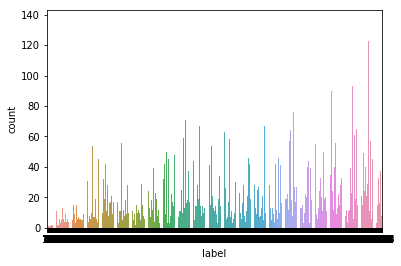

In [33]:
sns.countplot(df.label)

In [40]:
agc_2 = AgglomerativeClustering(n_clusters=16 ,connectivity=connectivity, linkage="ward")

In [41]:
agc_2.fit(X_sc)

C:\Anaconda3\envs\dsi\lib\site-packages\sklearn\cluster\hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<98337x98337 sparse matrix of type '<class 'numpy.float64'>'
	with 4916850 stored elements in Compressed Sparse Row format>,
            linkage='ward', memory=None, n_clusters=16,
            pooling_func=<function mean at 0x00000238A526D268>)

In [42]:
df["label_new"] = agc_2.labels_

In [43]:
df.label_new.value_counts(normalize=True)

1     0.148754
6     0.103471
2     0.092336
3     0.086722
0     0.078567
12    0.073736
7     0.065713
13    0.064045
10    0.057801
14    0.049513
4     0.047266
8     0.045131
9     0.040788
11    0.024406
5     0.013647
15    0.008105
Name: label_new, dtype: float64

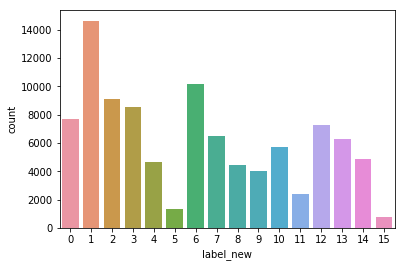

In [44]:
sns.countplot(df.label_new)

In [ ]:
clusters_to_try = [i for i in range(15,45)]
fitted_clusterers = []
cluster_labels = []
silhouette_scores = []

for n_clusters in clusters_to_try:
    agc_i = AgglomerativeClustering(n_clusters=n_clusters ,connectivity=connectivity, linkage="ward")
    agc_i.fit(X_sc)
    cluster_labels.append(agc_i.labels_)
    fitted_clusterers.append(agc_i.labels_)
    silhouette_scores.append(silhouette_score(X_sc,
                                              agc_i.labels_,
                                              sample_size=30000, #Necessary to avoid a Memory Error!  Adjust this line if still too much.
                                              random_state=20191505))

### Evaluating

In [57]:
cluster_scores = pd.DataFrame({"n_clusters" : clusters_to_try, "silhouette_score" : silhouette_scores})
cluster_scores.head()

,n_clusters,silhouette_score
0,15,0.254349
1,16,0.256650
2,17,0.261489
3,18,0.251383
4,19,0.240935


In [58]:
silhouette_scores[2]

0.2614894562850657

In [60]:
df.drop(columns=["label","label_new"], inplace=True)

In [62]:
df["label"] = cluster_labels[2]

In [63]:
df.head()

,artist_id,artist,album_id,album_names,track_id,track_number,track_title,track_duration,track_disc_number,danceability,...,key_tone_E,key_tone_F,key_tone_F#,key_tone_G,key_tone_G#,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0,label
0,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5n9QFM4EiMeLGO0Mbwaqov,1.0,Everything's Different Now,236733.0,1.0,0.672,...,0,0,0,0,0,0,0,1,0,4
1,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0BKslA1XqG8HBUKBl4d7EN,2.0,Rip In Heaven,211200.0,1.0,0.612,...,1,0,0,0,0,0,0,1,0,12
2,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5G7NBdQLHc7GkehNmLG3yJ,3.0,Why Must I,221000.0,1.0,0.586,...,0,0,0,0,0,0,0,1,0,13
3,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0J6nZDgEuwXtECq8Pukn1n,4.0,J For Jules,265493.0,1.0,0.475,...,0,0,0,0,0,0,0,1,0,4
4,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,3Lm7hSTabr01oav0WdSsuD,5.0,(Believed You Were) Lucky,216973.0,1.0,0.612,...,0,1,0,0,0,0,0,1,0,10


## Output

In [64]:
df.to_csv("../data/labeled.csv", index=False)